<a href="https://colab.research.google.com/github/petr-ngn/ML_Siamese_Neural_Networks/blob/main/04_Live_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b>LIVE DEMO<b><h1>

<h4>This notebook depicts the live demo of  our team members' reference and on-site photos<h4>

Importing relevant libraries

In [236]:
import warnings
warnings.filterwarnings('ignore')
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
from google.colab import drive
import cv2

Mounting the Google Drive

In [237]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing a costume created module by Petr Nguyen

In [238]:
sys.path.append('/content/drive/MyDrive/Agile_ML/src_PN')

In [239]:
import PN_functions as PN

In [240]:
random_seed = 1234
np.random.seed(random_seed)
tf.random.set_seed(random_seed)


Setting a path

In [241]:
path = '/content/drive/MyDrive/Agile_ML'
os.chdir(path)

Setting path to the live demo images' folders

In [242]:
reference_photos_path = './reference_imgs/'
onsite_photos_path = './onsite_imgs/'

Accessing images' names

In [243]:
reference_photos_names = sorted(os.listdir(reference_photos_path))
onsite_photos_names = sorted(os.listdir(onsite_photos_path))

In [244]:
print(f"rerefence photos' names: {reference_photos_names}")
print(f"on-site photos' names: {onsite_photos_names}")

rerefence photos' names: ['DM_REF.jpg', 'NM_REF.jpg', 'PH_REF.jpg', 'PN_REF.jpg', 'RP_REF.jpg']
on-site photos' names: ['DM_ON.jpg', 'NM_ON.jpg', 'PH_ON.jpg', 'PN_ON.jpg', 'RP_ON.jpg']


Plotting the team reference and on-site images

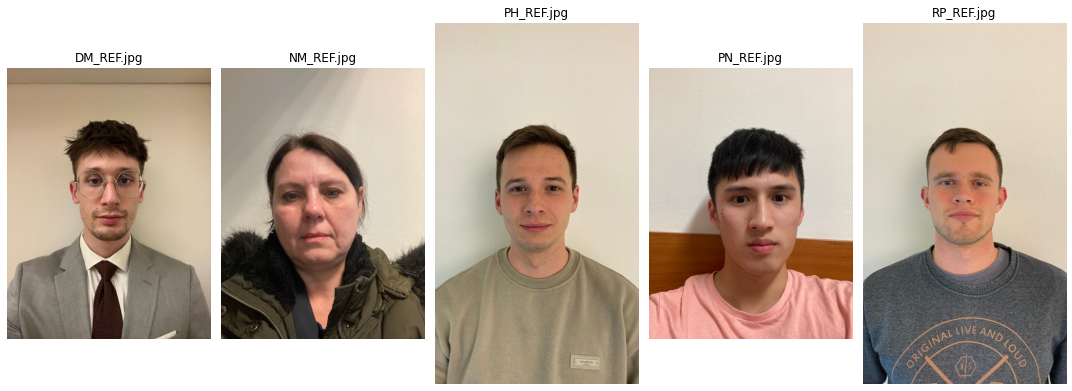

In [245]:
PN.plot_single_images(reference_photos_names, reference_photos_path)

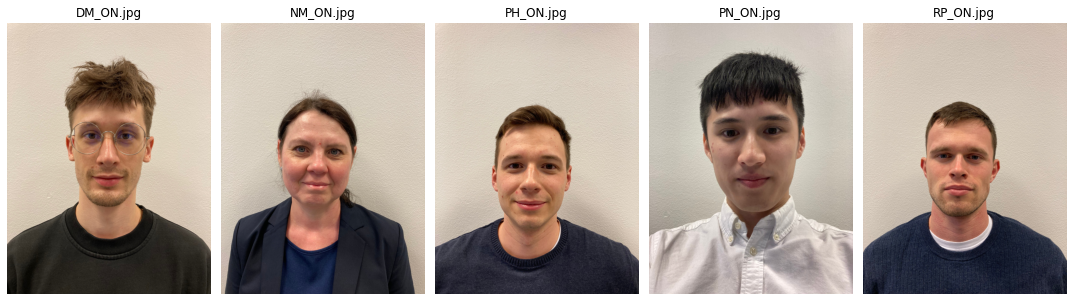

In [246]:
PN.plot_single_images(onsite_photos_names, onsite_photos_path)

Plotting the pairs

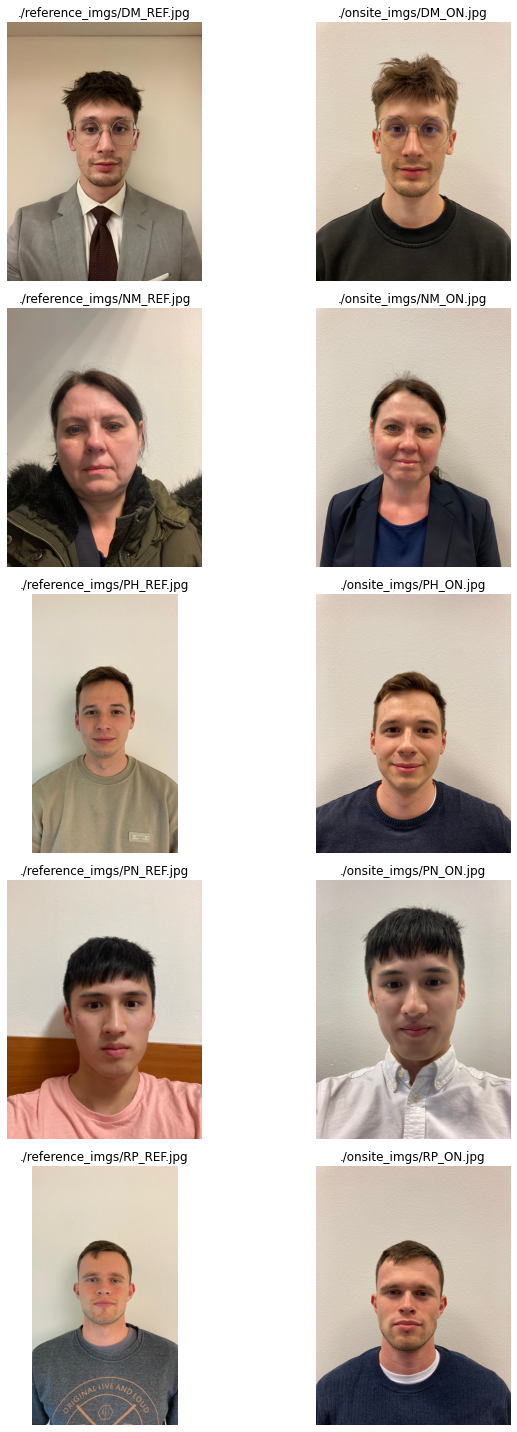

In [278]:
PN.plot_pairs_live_demo(reference_photos_names, onsite_photos_names,
              reference_photos_path, onsite_photos_path,
              5, 2, (10,20))

Cropping the images

In [279]:
reference_photos_cropped = PN.cropping_engine(reference_photos_path,
                                              reference_photos_names)

In [280]:
onsite_photos_cropped = PN.cropping_engine(onsite_photos_path,
                                           onsite_photos_names)

Plotting the cropped images

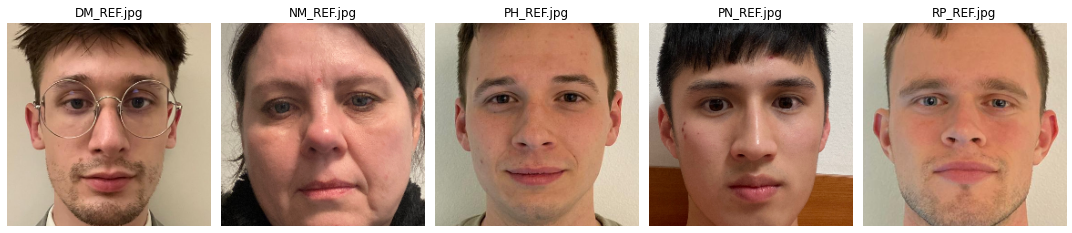

In [281]:
PN.plot_single_images(photos_dict = reference_photos_cropped)

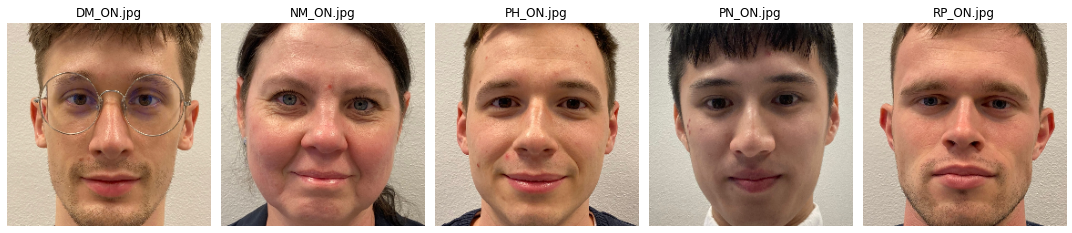

In [282]:
PN.plot_single_images(photos_dict = onsite_photos_cropped)

Saving the cropped images

In [283]:
if not os.path.exists('./cropped_live_demo/'):
    os.makedirs('./cropped_live_demo/')

In [284]:
for name, photo in reference_photos_cropped.items():
    cv2.imwrite(f'./cropped_live_demo/{name}', photo)

In [285]:
for name, photo in onsite_photos_cropped.items():
    cv2.imwrite(f'./cropped_live_demo/{name}', photo)

Loading and extracting the cropped images' names

In [286]:
cropped_list = sorted(os.listdir('./cropped_live_demo/'))

In [287]:
ref_init = 'REF'

In [288]:
ref_list = [f'./cropped_live_demo/{i}' for i in cropped_list if ref_init in i]
onsite_list = [f'./cropped_live_demo/{i}' for i in cropped_list if ref_init not in i]

In [289]:
print(ref_list)
print(onsite_list)

['./cropped_live_demo/DM_REF.jpg', './cropped_live_demo/NM_REF.jpg', './cropped_live_demo/PH_REF.jpg', './cropped_live_demo/PN_REF.jpg', './cropped_live_demo/RP_REF.jpg']
['./cropped_live_demo/DM_ON.jpg', './cropped_live_demo/NM_ON.jpg', './cropped_live_demo/PH_ON.jpg', './cropped_live_demo/PN_ON.jpg', './cropped_live_demo/RP_ON.jpg']


Loading the final model

In [290]:
final_model = tf.keras.models.load_model('Siamese_NN_.h5',
                                         custom_objects = {'contrastive__loss':PN.contrastive_loss})

Exctrating the Convolutional Neural Network embedding

In [291]:
CNN_model = final_model.get_layer('CNN')

TF preparation of the reference photos

In [292]:
ref_imgs = PN.tf_single_prep(ref_list)

Computing feature vectors of reference photos

In [293]:
ref_feat_vecs = CNN_model.predict(ref_imgs)

1/1 [==============================] - 0s 123ms/step


Storing the feature vectors of reference photos into a data frame

In [294]:
ref_feat_vecs_df = pd.DataFrame(np.transpose(ref_feat_vecs),
                                columns = [i.split('/')[-1] for i in ref_list])

In [295]:
ref_feat_vecs_df

,DM_REF.jpg,NM_REF.jpg,PH_REF.jpg,PN_REF.jpg,RP_REF.jpg
0,-0.998671,-0.913175,-0.644561,-0.999736,0.547662
1,-0.992423,0.399440,0.730622,-0.999888,0.939825
2,0.237261,-0.520968,-0.834700,0.997275,-0.924726
3,0.982930,0.974753,0.998264,0.989535,0.998148
4,0.896532,0.902838,-0.066433,0.910312,-0.510327
5,0.893261,0.497893,0.937903,0.972679,0.973605
6,0.320433,0.792062,0.226986,0.078224,-0.093734
7,-0.947438,0.575571,0.900706,-0.998303,0.992692
8,0.943651,-0.894203,-0.979300,0.999740,-0.996459
9,-0.779880,-0.923002,-0.745936,0.447797,-0.113415


Exporting the reference photos' feature vectors into CSV

In [296]:
ref_feat_vecs_df.to_csv('ref_feat_vecs_df.csv', index = False)

Loading the reference photos' feature vectors from CSV

In [297]:
ref_feat_vecs_df = pd.read_csv('ref_feat_vecs_df.csv')

In [298]:
ref_feat_vecs_df

,DM_REF.jpg,NM_REF.jpg,PH_REF.jpg,PN_REF.jpg,RP_REF.jpg
0,-0.998671,-0.913175,-0.644561,-0.999736,0.547662
1,-0.992423,0.399440,0.730622,-0.999888,0.939825
2,0.237261,-0.520968,-0.834700,0.997275,-0.924726
3,0.982930,0.974754,0.998264,0.989535,0.998148
4,0.896532,0.902838,-0.066433,0.910312,-0.510327
5,0.893261,0.497893,0.937903,0.972680,0.973605
6,0.320433,0.792062,0.226986,0.078224,-0.093734
7,-0.947438,0.575571,0.900706,-0.998303,0.992692
8,0.943651,-0.894204,-0.979300,0.999740,-0.996459
9,-0.779880,-0.923002,-0.745936,0.447797,-0.113415


TF preparation of the on-site photos

In [299]:
onsite_imgs = PN.tf_single_prep(onsite_list)

Computing feature vectors of on-site photos

In [300]:
onsite_feat_vecs = CNN_model.predict(onsite_imgs)

1/1 [==============================] - 0s 33ms/step


Storing the feature vectors of on-site photos into a data frame

In [301]:
onsite_feat_vecs_df = pd.DataFrame(np.transpose(onsite_feat_vecs),
                                   columns = [i.split('/')[-1] for i in onsite_list])

In [302]:
onsite_feat_vecs_df

,DM_ON.jpg,NM_ON.jpg,PH_ON.jpg,PN_ON.jpg,RP_ON.jpg
0,0.345502,-0.942238,-0.363477,-0.999934,0.124200
1,0.967932,-0.188585,0.553381,-0.998764,0.827867
2,-0.979951,-0.763263,-0.936408,0.990283,-0.956270
3,0.997681,0.984783,0.997999,0.914109,0.999007
4,-0.662023,0.917482,0.218120,0.990713,-0.455808
5,0.894245,0.732284,0.933990,0.784845,0.960398
6,-0.326338,0.876968,0.626701,0.450910,0.251432
7,0.985561,0.217041,0.878114,-0.997134,0.956937
8,-0.996891,-0.882699,-0.990885,0.999376,-0.996655
9,-0.737999,-0.922318,-0.782974,-0.301859,-0.609448


Predicting a person class (of on-site photo) based on precomputed feature vectors of refererence photos (by minimizing the Euclidean distance).

In [303]:
predicted_pairs, euclidean_distances = PN.live_demo_preds(ref_feat_vecs_df,
                                                          onsite_feat_vecs_df)

In [304]:
euclidean_distances

{'DM_ON.jpg': {'DM_REF.jpg': 4.181262808488059,
  'NM_REF.jpg': 2.487610383065975,
  'PH_REF.jpg': 1.3145385505266227,
  'PN_REF.jpg': 4.643478193115881,
  'RP_REF.jpg': 0.7199154450174711},
 'NM_ON.jpg': {'DM_REF.jpg': 2.5881129359572355,
  'NM_REF.jpg': 0.7723113545473773,
  'PH_REF.jpg': 1.6969153343157746,
  'PN_REF.jpg': 3.369676644937415,
  'RP_REF.jpg': 2.79774835885498},
 'PH_ON.jpg': {'DM_REF.jpg': 3.4353290449680833,
  'NM_REF.jpg': 1.1427364795945378,
  'PH_REF.jpg': 0.6029442348079772,
  'PN_REF.jpg': 4.041837701031951,
  'RP_REF.jpg': 1.5787182487225868},
 'PN_ON.jpg': {'DM_REF.jpg': 0.9184483873597518,
  'NM_REF.jpg': 3.3017219107862394,
  'PH_REF.jpg': 3.919182960660386,
  'PN_REF.jpg': 0.8650814619472825,
  'RP_REF.jpg': 4.515657571275141},
 'RP_ON.jpg': {'DM_REF.jpg': 3.90610278412563,
  'NM_REF.jpg': 2.0139849839869557,
  'PH_REF.jpg': 0.888841165441575,
  'PN_REF.jpg': 4.386696825962443,
  'RP_REF.jpg': 0.7499756462575065}}

In [305]:
predicted_pairs

{'DM_ON.jpg': 'RP_REF.jpg',
 'NM_ON.jpg': 'NM_REF.jpg',
 'PH_ON.jpg': 'PH_REF.jpg',
 'PN_ON.jpg': 'PN_REF.jpg',
 'RP_ON.jpg': 'RP_REF.jpg'}

Plotting the predicted pairs of person' photos

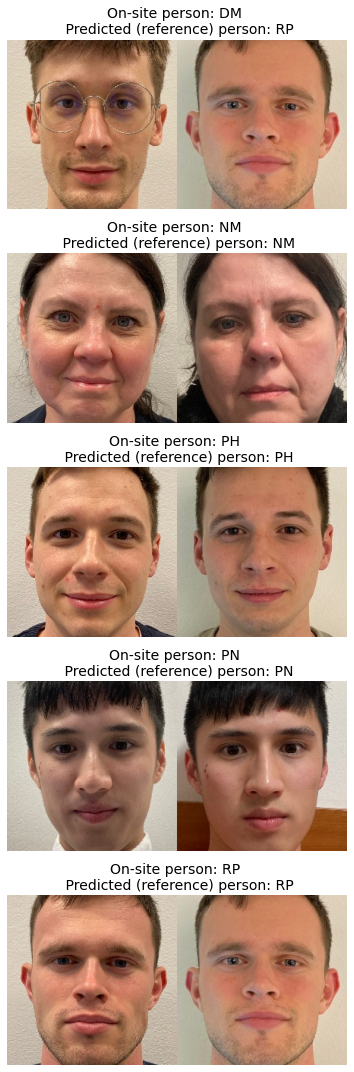

In [306]:
PN.plot_predicted_pairs(predicted_pairs)